# Project Introduction and Goal
Based on a dataset found from Kaggle.com: https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset?resource=download

Analyzing the sentiment analysis of online social medai posts from various users (goals will be further explained down below)

In [2]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

# Loading the Data

In [4]:
df = pd.read_csv("sentimentdataset.csv")
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


# Cleaning the data:

In [5]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [6]:
cols = df.columns.to_numpy()
cols

array(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype=object)

# Goals: 

Now, I want to define some goals for what questions I want to answer, or what I want to analyze. The main things I want to analyze are:

- which social media platform has on average more positive posts, and more negative posts.
- whether negative or positive posts get more likes
- whether negative or more positive posts get more retweets
- which country has the most positive or negative posts

By the end of this, I want to train my model on the texts and mood of the texts to be able to predict the sentiment analysis of a given post.

First, let's re-assign sentiment to all of the posts, using only Positive, Negative, and Neutral (in a new column). We first need to find all of the unique descriptors.

In [8]:
unique_sentiments = df['Sentiment'].unique()
unique_sentiments

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

I am manually creating a list of all of the positive, negative, and neutral descriptors.

In [9]:
positive_sentiments = ['Positive', 'Happiness', 'Joy', 'Love', 'Excitement', 'Amusement', 'Enjoyment', 'Admiration',
                       'Affection', 'Awe', 'Elation', 'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope',
                       'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence',
                       'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Free-spirited',
                       'Inspired', 'Confident', 'Blessed', 'Anticipation', 'Wonderment', 'Optimism', 'Enchantment',
                       'Intrigue', 'PlayfulJoy', 'Mindfulness', 'DreamChaser', 'Elegance', 'Whimsy', 'Pensive',
                       'Harmony', 'Creativity', 'Radiance', 'Rejuvenation', 'Inspiration', 'Coziness', 'Adventure',
                       'Euphoria', 'Melodic', 'FestiveJoy', 'InnerJourney', 'Freedom', 'Dazzle', 'ArtisticBurst',
                       'CulinaryOdyssey', 'Spark', 'Marvel', 'Heartwarming', 'Resilience', 'Immersion', 'Success',
                       'Reflection', 'Enchantment', 'Exploration', 'Amazement', 'Romance', 'Captivation', 'Wonder',
                       'Tranquility', 'Grandeur', 'Emotion', 'Energy', 'Celebration', 'Charm', 'Ecstasy', 'Hope',
                       'Creativity', 'Colorful', 'Pride', 'Hypnotic', 'Connection', 'Iconic', 'Euphoria', 'Journey',
                       'Engagement', 'Touched', 'Satisfaction', 'Admiration', 'Triumph', 'Heartwarming', 'Joy in Baking',
                       'Envisioning History', 'Imagination', 'Vibrancy', 'Mesmerizing', 'Culinary Adventure', 'Winter Magic',
                       'Thrilling Journey', "Nature's Beauty", 'Celestial Wonder', 'Creative Inspiration', 'Runway Creativity',
                       "Ocean's Freedom", 'Whispers of the Past', 'Relief', 'Positive', 'Happy']

negative_sentiments = ['Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Bitter', 'Despair', 'Loneliness', 'Jealousy',
                       'Resentment', 'Frustration', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Bitterness',
                       'Yearning', 'Fearful', 'Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious',
                       'Dismissive', 'Heartbreak', 'Betrayal', 'Suffering', 'EmotionalStorm', 'LostLove', 'Melancholy',
                       'Exhaustion', 'Sorrow', 'Darkness', 'Desperation', 'Ruins', 'Desolation', 'Pressure', 'Miscalculation',
                       'Challenge', 'Solace', 'Breakthrough', 'Obstacle', 'Sad', 'Hate', 'Bad', 'Disappointment', 'Isolation', 'Disgust']

neutral_sentiments = ['Neutral', 'Confusion', 'Indifference', 'Numbness', 'Ambivalence', 'Acceptance', 'Curiosity',
                      'Mindfulness', 'DreamChaser', 'Whimsy', 'Pensive', 'Reflection', 'Exploration', 'Amazement',
                      'Wonder', 'Resilience', 'Immersion', 'Embarrassed', 'Mischievous', ]

In [11]:
df['Sentiment Category'] = ""

for index, row in df.iterrows():
    sentiment = row['Sentiment'].strip()
    if sentiment in positive_sentiments:
        df.at[index, 'Sentiment Category'] = 'Positive'
    elif sentiment in negative_sentiments:
        df.at[index, 'Sentiment Category'] = 'Negative'
    elif sentiment in neutral_sentiments:
        df.at[index, 'Sentiment Category'] = 'Neutral'

df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment Category
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Positive
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Negative
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,Positive
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,Positive
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,Positive
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,Positive


Now, we'll analyze which social media platform has more positive and negative posts. We can do this by comparing the max amd min numbers of positive and negative posts, comparing the ratio of positive and nagative posts, and comparing the proportions of a post being positive, negative, or neutral based on the social media platform.

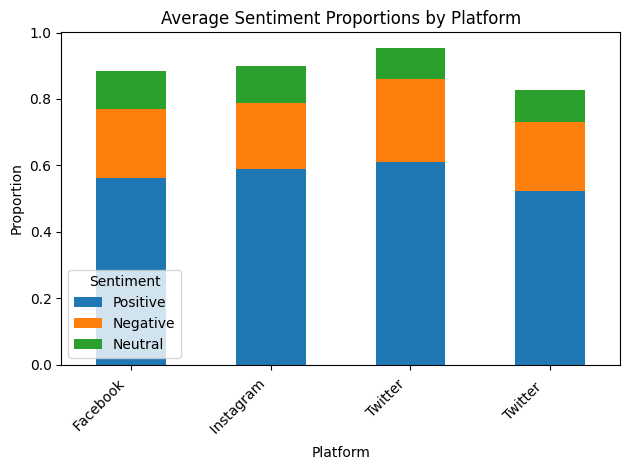

In [37]:
# visualize the comparison using matplotlib, sepcifically by the proportions and average proportions of each sentiment category

platform_sentiment_counts = df.groupby(['Platform', 'Sentiment Category']).size().unstack(fill_value = 0)
platform_sentiment_counts['Total'] = platform_sentiment_counts.sum(axis=1)

# Calculate the proportions of each sentiment category
platform_sentiment_proportions = platform_sentiment_counts.div(platform_sentiment_counts['Total'], axis=0)

# Plot the average sentiment proportions for each platform
platform_sentiment_proportions[['Positive', 'Negative', 'Neutral']].plot(kind='bar', stacked=True)
plt.title('Average Sentiment Proportions by Platform')
plt.xlabel('Platform')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

Now, let's see whether negative or positive posts get more likes and retweets on average.

In [15]:
positive_posts = df[df['Sentiment Category'] == 'Positive']
positive_posts

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment Category
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Positive
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Positive
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,Positive
6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,Positive
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,Positive
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,Positive
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,Positive


Positive Posts Likes Statistics (max, mean, std)

In [24]:
positive_posts_likes_max = positive_posts['Likes'].max()
positive_posts_likes_max

80.0

In [25]:
positive_posts_likes_mean = positive_posts['Likes'].mean()
positive_posts_likes_mean

46.72857142857143

In [26]:
positive_posts_likes_std = positive_posts['Likes'].std()
positive_posts_likes_std

12.996332982243077

Positive Posts Retweets Statistics (max, mean, std)

In [27]:
positive_posts_retweets_max = positive_posts['Retweets'].max()
positive_posts_retweets_max

40.0

In [28]:
positive_posts_retweets_mean = positive_posts['Retweets'].mean()
positive_posts_retweets_mean

23.433333333333334

In [29]:
positive_posts_retweets_std = positive_posts['Retweets'].std()
positive_posts_retweets_std

6.49603024239446

In [23]:
negative_posts = df[df['Sentiment Category'] == 'Negative']
negative_posts

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment Category
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Negative
8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8,Negative
11,Feeling a bit under the weather today. ...,Negative,2023-01-18 10:30:00,WellnessCheck,Twitter,#SickDay #Health,7.0,15.0,Canada,2023,1,18,10,Negative
19,Winter blues got me feeling low. ...,Negative,2023-01-20 15:15:00,WinterBlues,Instagram,#WinterBlues #Mood,8.0,15.0,USA,2023,1,20,15,Negative
52,Can't believe the injustice happening in our ...,Anger,2023-02-11 09:30:00,SocialJustice,Twitter,#Injustice #Angry,20.0,40.0,Canada,2023,2,11,9,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Having a bad hair day and feeling self-conscio...,Bad,2023-09-27 17:30:00,BadHairDayBluesHighSchool,Instagram,#BadHairDay #HighSchoolConfidence,18.0,36.0,Canada,2023,9,27,17,Negative
700,Feeling a sense of despair after a major proje...,Sad,2023-09-28 22:00:00,ProjectFailureDespairHighSchool,Facebook,#ProjectStruggles #HighSchoolHardships,21.0,41.0,UK,2023,9,28,22,Negative
701,Experiencing hate comments for expressing pers...,Hate,2023-09-29 15:45:00,OpinionsHateHighSchool,Twitter,#OnlineOpinions #HighSchoolCriticism,24.0,48.0,USA,2023,9,29,15,Negative
702,Having a string of bad luck with constant tech...,Bad,2023-09-30 18:20:00,TechMalfunctionWoesHighSchool,Instagram,#TechIssues #HighSchoolTech,22.0,43.0,Canada,2023,9,30,18,Negative


Negative Posts Likes Statistics (max, mean, std)

In [30]:
negative_posts_likes_max = negative_posts['Likes'].max()
negative_posts_likes_max

80.0

In [31]:
negative_posts_likes_mean = negative_posts['Likes'].mean()
negative_posts_likes_mean

36.18064516129032

In [32]:
negative_posts_likes_std = negative_posts['Likes'].std()
negative_posts_likes_std

13.932803005176815

Negative Posts Retweets Statistics (max, mean, std)

In [33]:
negative_posts_retweets_max = negative_posts['Retweets'].max()
negative_posts_retweets_max

40.0

In [35]:
negative_posts_retweets_mean = negative_posts['Retweets'].mean()
negative_posts_retweets_mean

18.135483870967743

In [36]:
negative_posts_retweets_std = negative_posts['Retweets'].std()
negative_posts_retweets_std

6.998216302758347

Now, let's visualize our statistics.

C:\Users\avapu\AppData\Local\Temp\ipykernel_46164\2972649895.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
C:\Users\avapu\AppData\Local\Temp\ipykernel_46164\2972649895.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


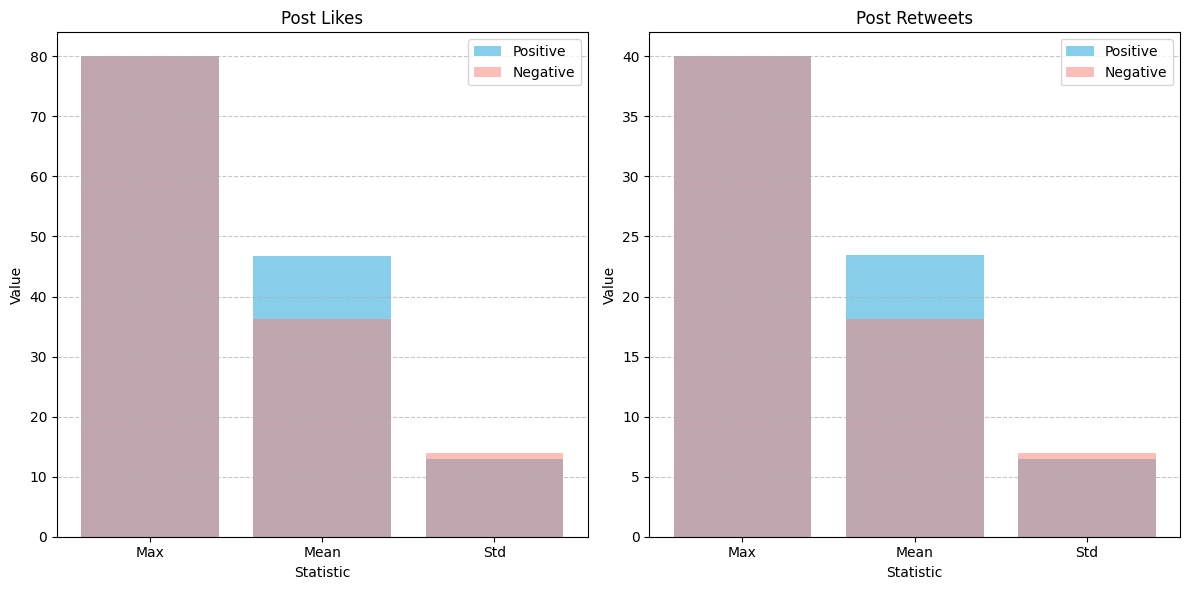

In [39]:
# define the statistics for positive and negative posts likes and retweets
positive_posts_likes_stats = [positive_posts_likes_max, positive_posts_likes_mean, positive_posts_likes_std]
positive_posts_retweets_stats = [positive_posts_retweets_max, positive_posts_retweets_mean, positive_posts_retweets_std]

negative_posts_likes_stats = [negative_posts_likes_max, negative_posts_likes_mean, negative_posts_likes_std]
negative_posts_retweets_stats = [negative_posts_retweets_max, negative_posts_retweets_mean, negative_posts_retweets_std]

# define the labels for the statistics
labels = ['Max', 'Mean', 'Std']

# create plots for the likes stats and the retweets stats
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# plot likes
axes[0].bar(labels, positive_posts_likes_stats, color='skyblue', label='Positive')
axes[0].bar(labels, negative_posts_likes_stats, color='salmon', label='Negative', alpha=0.5)
axes[0].set_title('Post Likes')
axes[0].set_ylabel('Value')
axes[0].legend()

# plot retweets
axes[1].bar(labels, positive_posts_retweets_stats, color='skyblue', label='Positive')
axes[1].bar(labels, negative_posts_retweets_stats, color='salmon', label='Negative', alpha=0.5)
axes[1].set_title('Post Retweets')
axes[1].set_ylabel('Value')
axes[1].legend()

# add labels and adjust layout
for ax in axes:
    ax.set_xticklabels(labels)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('Statistic')

plt.tight_layout()
plt.show()

Based on these plots and statistics, we can see that there is not a big difference between the stastistics of likes and retweets based on the sentiment of the post. The only noticable difference is the mean, where, on average, negative posts get more likes and retweets. This aligns with the ideas I had prior to this, because many people talk about rage-baiting, and how negative content tends to get more views, likes, and retweets. Whether that be because the poster themself is doing or saying something negative, or if they are talking about a topic that has a general negative sentiment associated with it. However, I was surprised that the max and std statistics were not that different.

Now, we're going to analyze which country has more or less positive and negative posts, and see if there is a correlation between the country and the sentiment of the psot.

In [58]:
# group by data by country and sentiment and calulcate the counts
country_sentiments = df.groupby(['Country', 'Sentiment Category']).size().unstack(fill_value=0)
country_sentiments

Sentiment Category,,Negative,Neutral,Positive
Country,,,,
Australia,2,12,4,23
Australia,0,0,0,2
Australia,0,1,0,4
Australia,0,3,6,3
Australia,0,3,2,0
...,...,...,...,...
USA,6,8,3,3
USA,0,1,0,0
USA,0,1,0,3


In [68]:
unique_countries = df['Country'].unique()
unique_countries_cleaned = []
for i in unique_countries:
    unique_countries_cleaned.append(i.strip())

unique_countries_cleaned = set(unique_countries_cleaned)
unique_countries_cleaned = list(unique_countries_cleaned)
unique_countries_cleaned = sorted(unique_countries_cleaned)

unique_countries_cleaned

['Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Cambodia',
 'Canada',
 'China',
 'Colombia',
 'Czech Republic',
 'Denmark',
 'France',
 'Germany',
 'Greece',
 'India',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kenya',
 'Maldives',
 'Netherlands',
 'Norway',
 'Peru',
 'Portugal',
 'Scotland',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'UK',
 'USA']

In [90]:
# calculate the total count of positive and negative posts for each country
new_country = unique_countries_cleaned[0]
positive_sum = 0
negative_sum = 0
country_sentiment_counts = []

for index, row in country_sentiments.iterrows():
    country = row
    if (index == new_country):
        positive_sum += country.Positive
        negative_sum += country.Negative
    elif (index != new_country):
        country_sentiment_counts.append({'Country': index, 'Positive': positive_sum, 'Negative': negative_sum})
        new_country = index
        positive_sum = 0
        negative_sum = 0
        positive_sum += country.Positive
        negative_sum += country.Positive

country_sentiment_df = pd.DataFrame(country_sentiment_counts)
country_sentiment_df

,Country,Positive,Negative
0,Australia,0,0
1,Australia,23,23
2,Australia,2,2
3,Australia,4,4
4,Australia,3,3
...,...,...,...
110,USA,0,0
111,USA,3,3
112,USA,0,0
113,USA,3,3


In [97]:
sentiment_counts = df.groupby(['Country', 'Sentiment Category']).size().unstack(fill_value=0)
sentiment_counts['Total'] = sentiment_counts.sum(axis=1)
sentiment_proportions = sentiment_counts.div(sentiment_counts['Total'], axis=0)
sentiment_proportions



Sentiment Category,,Negative,Neutral,Positive,Total
Country,,,,,
Australia,0.048780,0.292683,0.097561,0.560976,1.0
Australia,0.000000,0.000000,0.000000,1.000000,1.0
Australia,0.000000,0.200000,0.000000,0.800000,1.0
Australia,0.000000,0.250000,0.500000,0.250000,1.0
Australia,0.000000,0.600000,0.400000,0.000000,1.0
...,...,...,...,...,...
USA,0.300000,0.400000,0.150000,0.150000,1.0
USA,0.000000,1.000000,0.000000,0.000000,1.0
USA,0.000000,0.250000,0.000000,0.750000,1.0


C:\Users\avapu\AppData\Local\Temp\ipykernel_46164\843792277.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=country_sentiment_proportions[['Positive', 'Negative']], ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


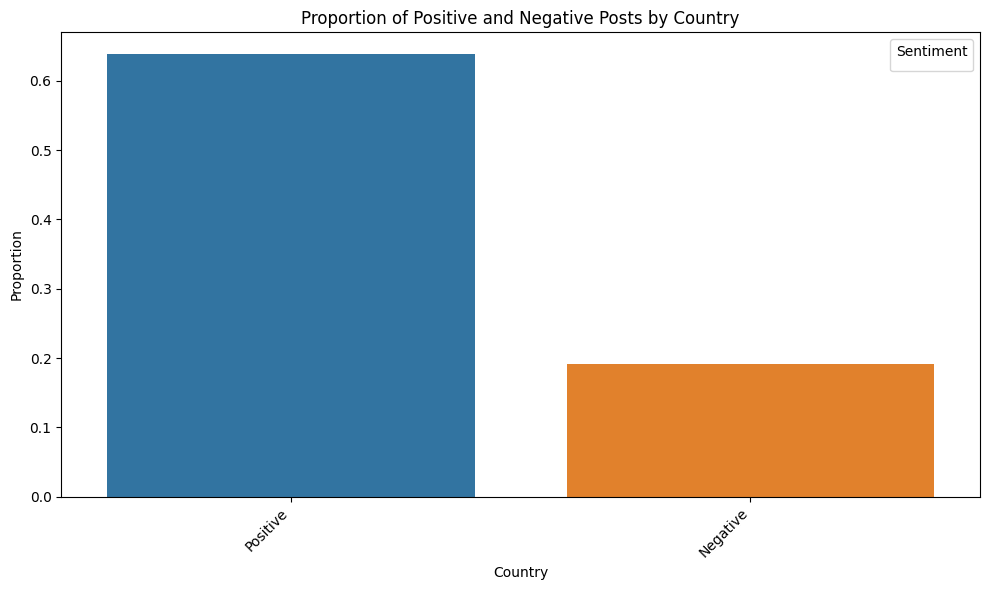

In [98]:
# plot the proportions of positive and negative posts across countries
plt.figure(figsize=(10, 6))
sns.barplot(data=country_sentiment_proportions[['Positive', 'Negative']], ci=None)
plt.title('Proportion of Positive and Negative Posts by Country')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()


In [100]:
# calculate the correlation between the country and the sentiment
correlation = sentiment_counts.corr()
correlation

Sentiment Category,,Negative,Neutral,Positive,Total
Sentiment Category,,,,,
,1.000000,0.424115,0.222704,0.203569,0.389696
Negative,0.424115,1.000000,0.617376,0.764028,0.885430
Neutral,0.222704,0.617376,1.000000,0.621630,0.749387
Positive,0.203569,0.764028,0.621630,1.000000,0.954881
Total,0.389696,0.885430,0.749387,0.954881,1.000000


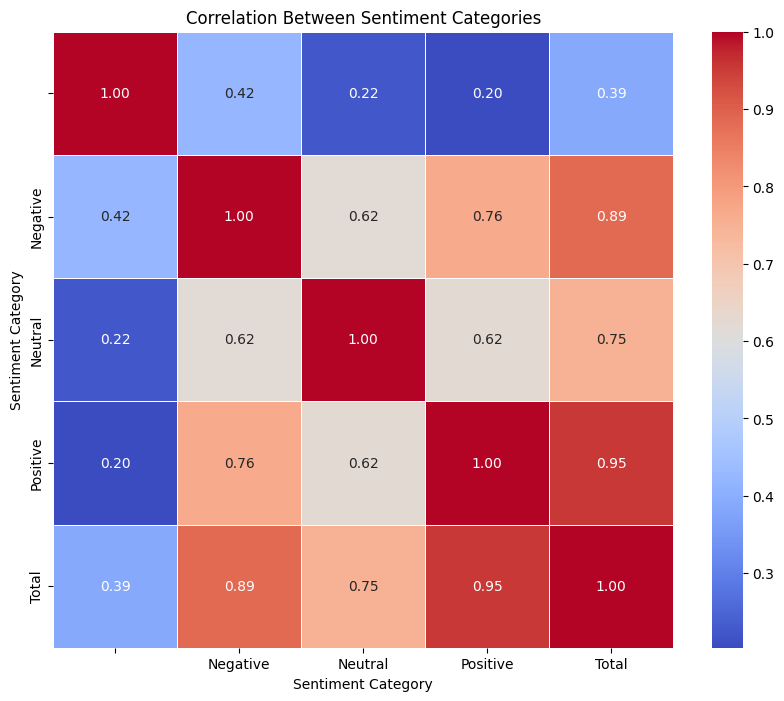

In [101]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Category')
plt.show()

Now, I want to train my model on the texts and mood of the texts to be able to predict the sentiment analysis of a given post.

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [104]:
# prepare features and target
text_data = df['Text']
features = text_data
target = df['Sentiment Category']

In [115]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_data, target, test_size=0.2, random_state=42)

In [116]:
X_train.shape

(585,)

In [117]:
X_test.shape

(147,)

In [118]:
y_train.shape

(585,)

In [119]:
y_test.shape

(147,)

In [120]:
# vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [121]:
# train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [122]:
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6326530612244898

In [123]:
# get the feature names
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['ablaze', 'about', 'abstract', ..., 'zen', 'zero', 'zestful'],
      dtype=object)

In [125]:
# get the coefficients
coefficients = model.coef_[0]
coefficients

array([ 0.23105369, -0.11501222, -0.06128801, ..., -0.02835021,
       -0.03166078,  0.25782949])

In [128]:
# store names and coefficients in a new dataframe
new_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
new_df = new_df.reindex(new_df['Coefficient'].abs().sort_values(ascending=False).index)
new_df

,Feature,Coefficient
889,grief,1.476773
520,determination,1.398533
1298,nostalgia,1.144171
1923,tears,1.025469
1320,old,0.973249
...,...,...
665,every,0.004615
1207,memories,0.001971
567,dreams,-0.001678
1114,level,0.001497


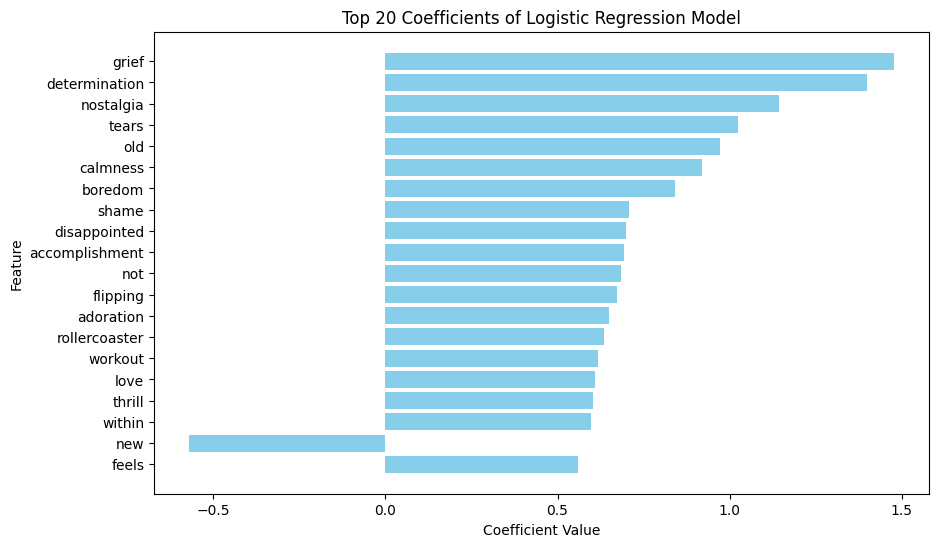

In [129]:
# Plot the top 20 coefficients
plt.figure(figsize=(10, 6))
plt.barh(new_df['Feature'][:20], new_df['Coefficient'][:20], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 20 Coefficients of Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to display top coefficients at the top
plt.show()